In [1]:
import pandas as pd
from pathlib import Path

# Loading the train.csv

In [2]:
TRAIN_CSV = Path('Artifacts/train.csv')

In [3]:
sales_df = pd.read_csv(TRAIN_CSV)
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Getting More Information about train.csv

In [4]:
sales_df.shape

(8523, 12)

In [5]:
sales_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Checking for Nan values

In [7]:
sales_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
sales_df.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

# Imputing the missing values for "Outlet_Size"

In [9]:
import matplotlib.pyplot as plt

In [10]:
print("Outlet_Size : ",sales_df["Outlet_Size"].dtype)

Outlet_Size :  object


In [11]:
sales_df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [12]:
sales_df.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [13]:
without_Nan_Outlet_size = sales_df[sales_df.Outlet_Size.isnull() == False]
without_Nan_Outlet_size.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [14]:
Nan_Outlet_size = sales_df[sales_df.Outlet_Size.isnull()]
Nan_Outlet_size.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [15]:
 random_sampled_Outlet_size = sales_df[sales_df.Outlet_Size.isnull() == False].sample(2410).Outlet_Size.values
 random_sampled_Outlet_size

array(['Medium', 'High', 'Medium', ..., 'Medium', 'Small', 'Medium'],
      dtype=object)

In [16]:
Nan_Outlet_size["Outlet_Size"] = random_sampled_Outlet_size
Nan_Outlet_size.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_12588\1714010487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nan_Outlet_size["Outlet_Size"] = random_sampled_Outlet_size


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,High,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,Small,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Medium,Tier 3,Grocery Store,178.4344


In [17]:
imputed_outlet_size = pd.concat([without_Nan_Outlet_size,Nan_Outlet_size])
imputed_outlet_size.shape

(8523, 12)

In [18]:
imputed_outlet_size.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                   0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

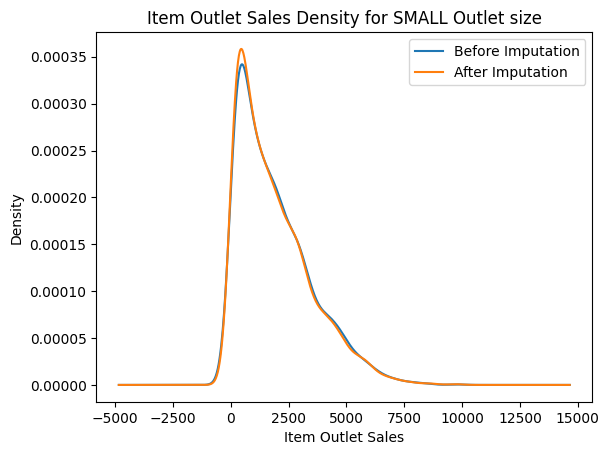

In [20]:
sales_df[sales_df.Outlet_Size=='Small']['Item_Outlet_Sales'].plot.kde(label='Before Imputation')
imputed_outlet_size[imputed_outlet_size.Outlet_Size=='Small']['Item_Outlet_Sales'].plot.kde(label='After Imputation')
plt.xlabel("Item Outlet Sales")
plt.title("Item Outlet Sales Density for SMALL Outlet size")
plt.legend()

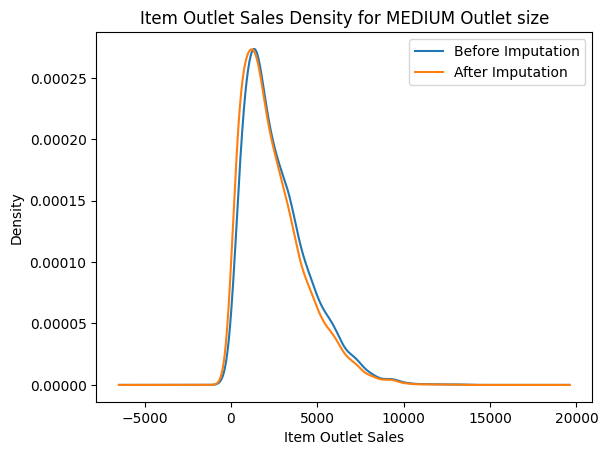

In [19]:
sales_df[sales_df.Outlet_Size=='Medium']['Item_Outlet_Sales'].plot.kde(label='Before Imputation')
imputed_outlet_size[imputed_outlet_size.Outlet_Size=='Medium']['Item_Outlet_Sales'].plot.kde(label='After Imputation')
plt.xlabel("Item Outlet Sales")
plt.title("Item Outlet Sales Density for MEDIUM Outlet size")
plt.legend()

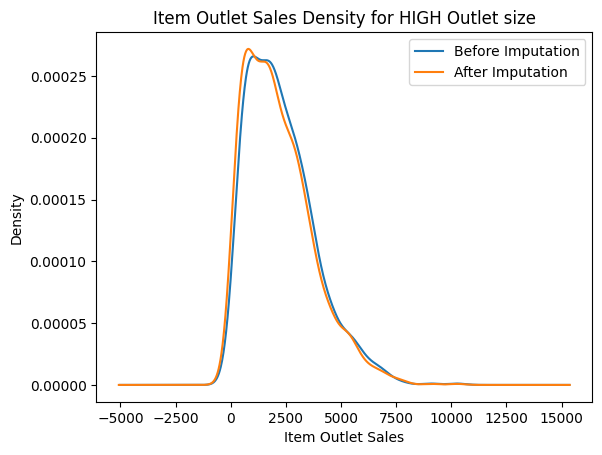

In [21]:
sales_df[sales_df.Outlet_Size=='High']['Item_Outlet_Sales'].plot.kde(label='Before Imputation')
imputed_outlet_size[imputed_outlet_size.Outlet_Size=='High']['Item_Outlet_Sales'].plot.kde(label='After Imputation')
plt.xlabel("Item Outlet Sales")
plt.title("Item Outlet Sales Density for HIGH Outlet size")
plt.legend()

In [64]:
before_imputation = sales_df[sales_df.Outlet_Size=='Small']['Item_Outlet_Sales'].describe()['std']
after_imputation = imputed_outlet_size[imputed_outlet_size.Outlet_Size=='Small']['Item_Outlet_Sales'].describe()['std']

print(f"=====SMALL OUTLET SIZE======")
print(f"Before Imputation Variance : {before_imputation**2}")
print(f"After Imputation Variance : {after_imputation**2}")

=====SMALL OUTLET SIZE======
Before Imputation Variance : 2503895.9696139977
After Imputation Variance : 2501952.0530068264


In [63]:
before_imputation = sales_df[sales_df.Outlet_Size=='Medium']['Item_Outlet_Sales'].describe()['std']
after_imputation = imputed_outlet_size[imputed_outlet_size.Outlet_Size=='Medium']['Item_Outlet_Sales'].describe()['std']

print(f"=====MEDIUM OUTLET SIZE======")
print(f"Before Imputation Variance : {before_imputation**2}")
print(f"After Imputation Variance : {after_imputation**2}")

=====MEDIUM OUTLET SIZE======
Before Imputation Variance : 3441806.1034910944
After Imputation Variance : 3302865.936854755


In [65]:
before_imputation = sales_df[sales_df.Outlet_Size=='High']['Item_Outlet_Sales'].describe()['std']
after_imputation = imputed_outlet_size[imputed_outlet_size.Outlet_Size=='High']['Item_Outlet_Sales'].describe()['std']

print(f"=====HIGH OUTLET SIZE======")
print(f"Before Imputation Variance : {before_imputation**2}")
print(f"After Imputation Variance : {after_imputation**2}")

=====HIGH OUTLET SIZE======
Before Imputation Variance : 2351719.364319561
After Imputation Variance : 2373655.19325156


# Filling Nan for "Item_weight"

In [32]:
imputed_outlet_size.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [29]:
imputed_outlet_size.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                   0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [31]:
print("Item_Weight : ",imputed_outlet_size["Item_Weight"].dtype)

Item_Weight :  float64


In [38]:
imputed_outlet_size.shape

(8523, 12)

In [36]:
without_Nan_Item_weight = imputed_outlet_size[imputed_outlet_size.Item_Weight.isnull()==False]
without_Nan_Item_weight.shape

(7060, 12)

In [39]:
Nan_Item_weight = imputed_outlet_size[imputed_outlet_size.Item_Weight.isnull()]
Nan_Item_weight.shape

(1463, 12)

In [41]:
without_Nan_Item_weight.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [40]:
Nan_Item_weight.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


## Detecting outliers

Text(0, 0.5, 'Item weight')

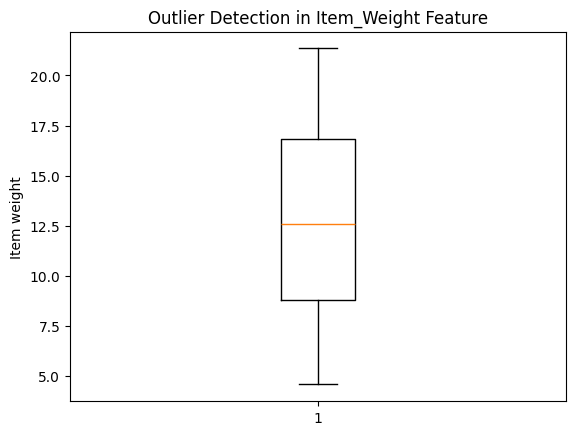

In [49]:
plt.boxplot(without_Nan_Item_weight["Item_Weight"])
plt.title("Outlier Detection in Item_Weight Feature")
plt.ylabel("Item weight")

Text(0.5, 0, 'Index')

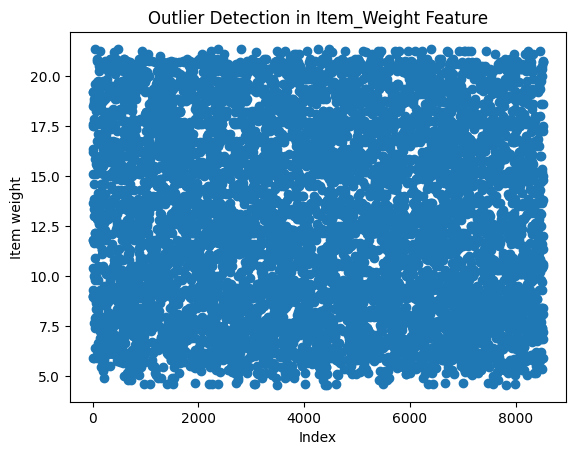

In [48]:
plt.scatter(without_Nan_Item_weight.index,without_Nan_Item_weight["Item_Weight"])
plt.title("Outlier Detection in Item_Weight Feature")
plt.ylabel("Item weight")
plt.xlabel("Index")

## ` Data is uniformily spreaded out That's why there is no Outlier detected in "Item_weight" feature`

In [99]:
random_sampled_Item_Weight= without_Nan_Item_weight.Item_Weight.sample(1463).values
random_sampled_Item_Weight

array([21.1 , 19.6 , 15.5 , ..., 10.1 , 15.15, 19.1 ])

In [103]:
Nan_Item_weight["Item_Weight"] = random_sampled_Item_Weight
Nan_Item_weight["Item_Weight"].head()

C:\Users\hp\AppData\Local\Temp\ipykernel_12588\2729443437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nan_Item_weight["Item_Weight"] = random_sampled_Item_Weight


7     21.1
18    19.6
21    15.5
23     8.3
29     9.0
Name: Item_Weight, dtype: float64

In [106]:
Imputed_Item_Weight = pd.concat([without_Nan_Item_weight,Nan_Item_weight])
Imputed_Item_Weight.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

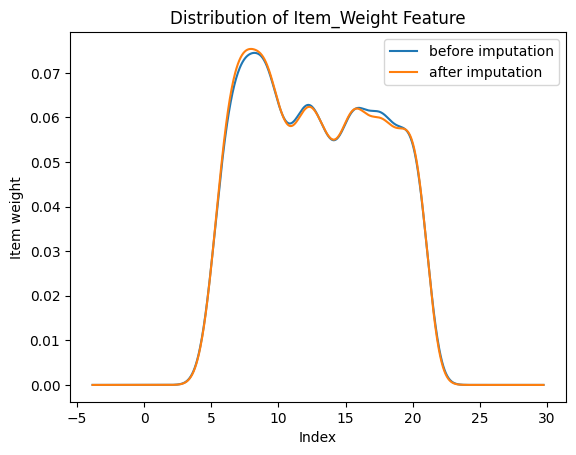

In [107]:
without_Nan_Item_weight.Item_Weight.plot.kde(label = "before imputation")
Imputed_Item_Weight.Item_Weight.plot.kde(label = "after imputation")
plt.title("Distribution of Item_Weight Feature")
plt.ylabel("Item weight")
plt.xlabel("Index")
plt.legend()

In [80]:
without_Nan_Item_weight.select_dtypes(exclude='object').corr().iloc[:1,1:]

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,-0.014048,0.027141,-0.011588,0.014123


In [108]:
Imputed_Item_Weight.select_dtypes(exclude='object').corr().iloc[:1,1:]

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,-0.016772,0.029999,0.005563,0.008816


In [109]:
before_imputation = without_Nan_Item_weight['Item_Weight'].describe()['std']
after_imputation = Imputed_Item_Weight['Item_Weight'].describe()['std']

print(f"Before Imputation Variance : {before_imputation**2}")
print(f"After Imputation Variance : {after_imputation**2}")

Before Imputation Variance : 21.56168825983656
After Imputation Variance : 21.614767562737256


# Data Visualisation for outlier detection

In [112]:
Imputed_sales_df = Imputed_Item_Weight.copy()
Imputed_sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [145]:
target_attribute = Imputed_sales_df.pop('Item_Outlet_Sales')
target_attribute.head()

0    3735.1380
1     443.4228
2    2097.2700
4     994.7052
5     556.6088
Name: Item_Outlet_Sales, dtype: float64

In [146]:
numerical_attributes = Imputed_sales_df.select_dtypes(exclude='object')
numerical_attributes.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.300,0.016047,249.8092,1999
1,5.920,0.019278,48.2692,2009
2,17.500,0.016760,141.6180,1999
4,8.930,0.000000,53.8614,1987
5,10.395,0.000000,51.4008,2009


In [171]:
numerical_attributes.Outlet_Establishment_Year.value_counts()

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

In [147]:
object_attributes = Imputed_sales_df.select_dtypes(include='object')
object_attributes.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
5,FDP36,Regular,Baking Goods,OUT018,Medium,Tier 3,Supermarket Type2


## Numerical Features Outlier detection and treatment

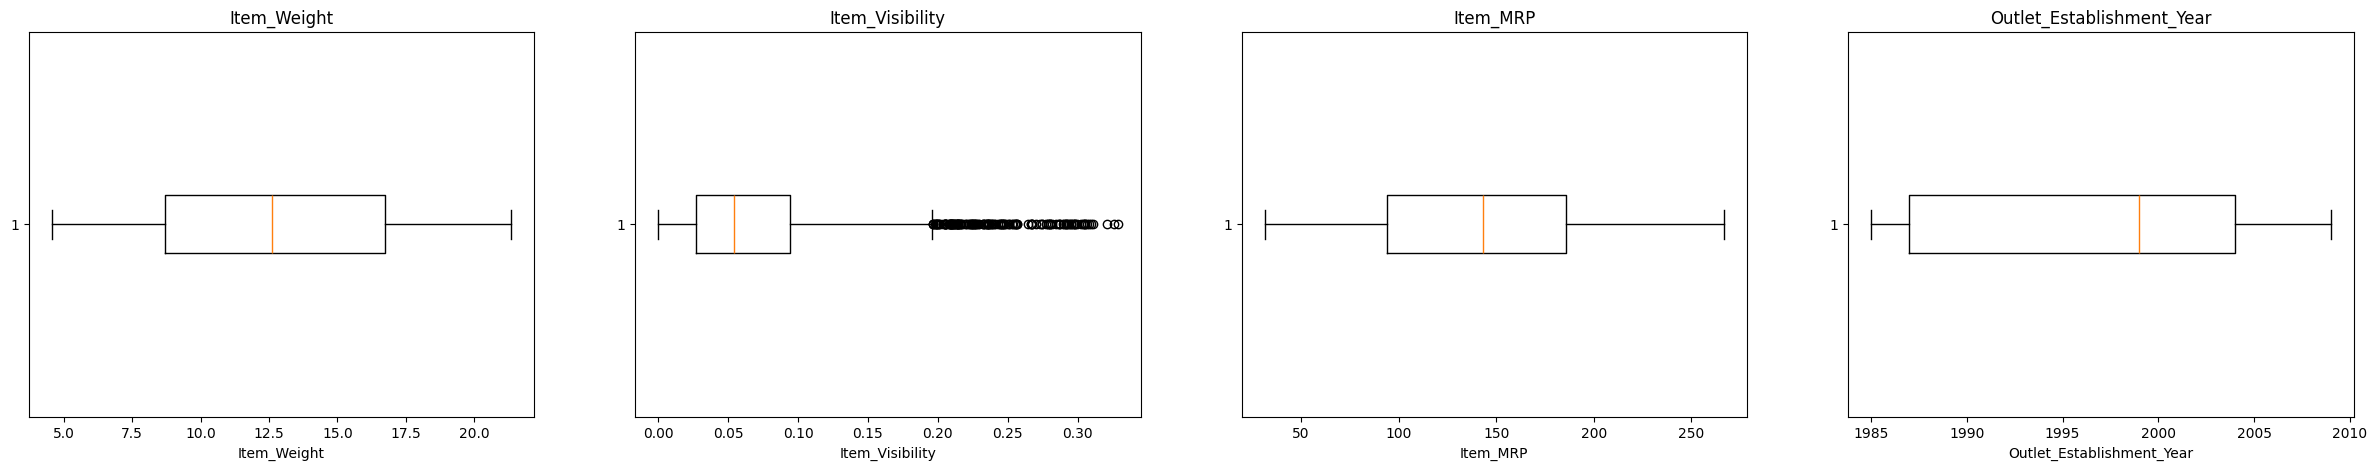

In [148]:
plt.figure(figsize = (30,5))

columns = numerical_attributes.columns

for idx,col in enumerate(columns):
    plt.subplot(1,len(columns),idx+1)
    plt.boxplot(numerical_attributes[col],vert=False)
    plt.title(col)
    plt.xlabel(col)

## `Outliers Found in "Item_Visibility" numerical attribute according to boxplot, since the outliers are very close to the max-value and hence cannot be the outliers`

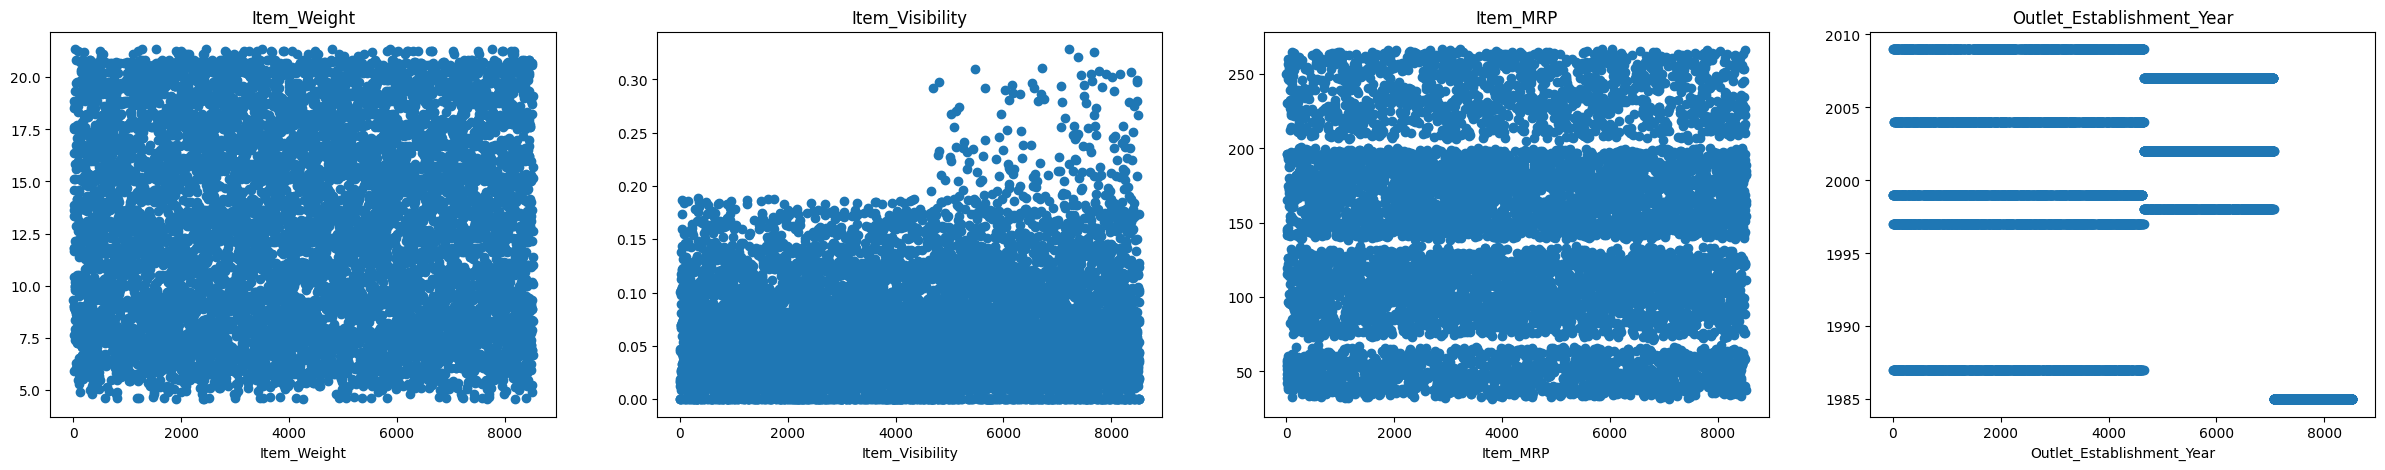

In [170]:
plt.figure(figsize = (30,5))

columns = numerical_attributes.columns
0
for idx,col in enumerate(columns):
    plt.subplot(1,len(columns),idx+1)

    x =  range(1,numerical_attributes.shape[0]+1)
    y = numerical_attributes[col]
    plt.scatter(x,y)
    plt.title(col)
    plt.xlabel(col)

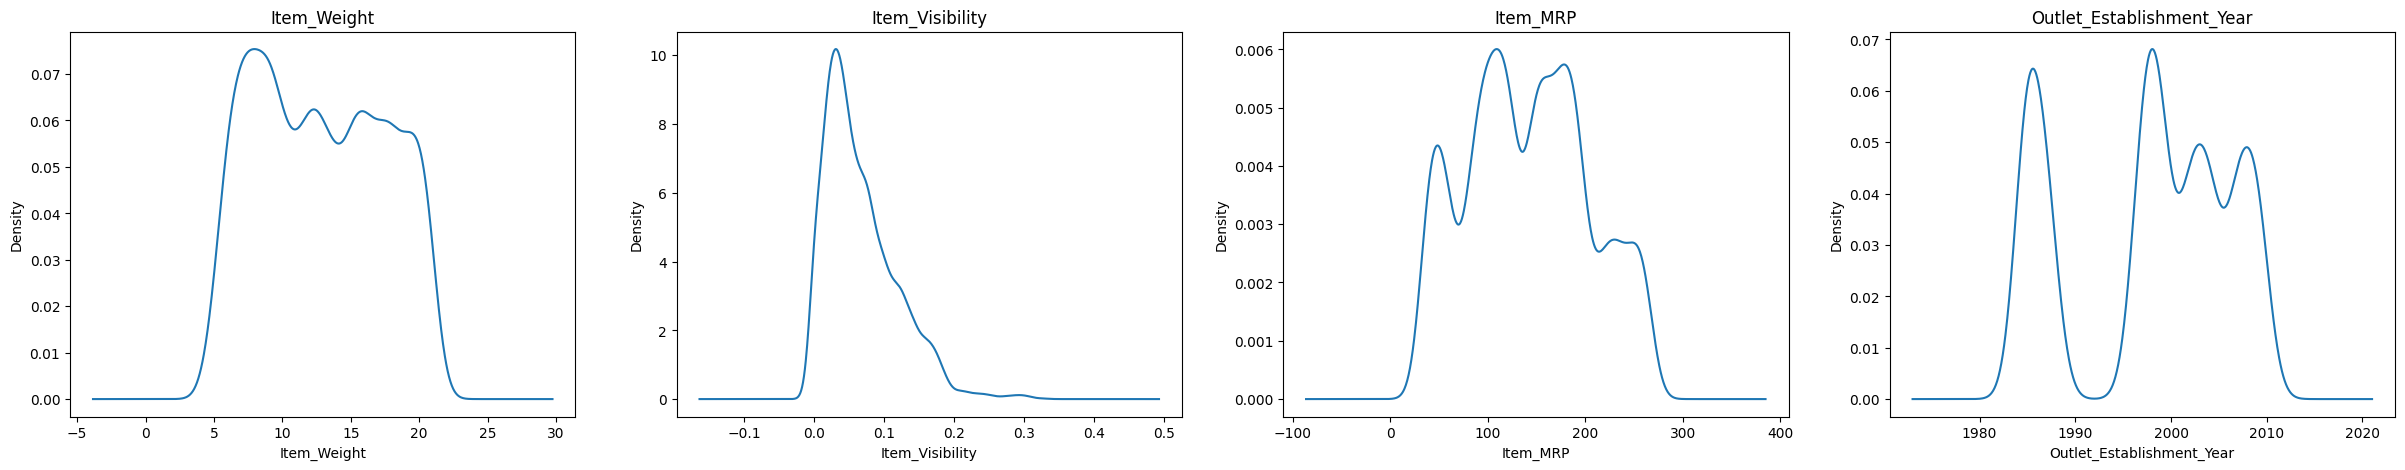

In [167]:
plt.figure(figsize = (30,5))

columns = numerical_attributes.columns

for idx,col in enumerate(columns):
    plt.subplot(1,len(columns),idx+1)
    numerical_attributes[col].plot.kde()
    plt.title(col)
    plt.xlabel(col)

## Feature Standardization